In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_df = pd.read_csv("../data/test_labels.csv")
train_df = pd.read_csv("../data/train_labels.csv")
train_rep_df = pd.read_csv("../data/train_rep_labels.csv")
train_synth_df = pd.read_csv("../data/train_synth_labels.csv")

In [3]:
x = list(train_df.labels.unique())
y_before = [train_df['labels'].value_counts()[label] for label in x]
y_rep_after = [train_rep_df['labels'].value_counts()[label] for label in x]
y_synth_after = [train_synth_df['labels'].value_counts()[label] for label in x]

In [4]:
for cla in zip(x, y_before):
    print(cla[0], cla[1])

D 1457
M 206
C 252
H 119


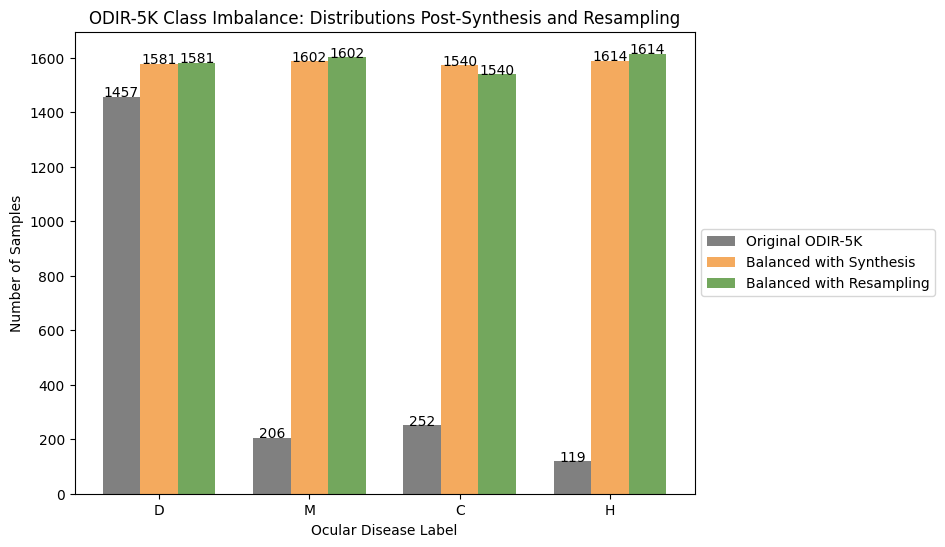

In [5]:
X_axis = np.arange(len(x))

width=0.25

plt.figure(figsize=(8,6))
plt.bar(X_axis-0.25, y_before, width, label="Original ODIR-5K", color = 'gray')
plt.bar(X_axis, y_synth_after, width, label="Balanced with Synthesis", color='#f4aa5eff')
plt.bar(X_axis+0.25, y_rep_after, width, label="Balanced with Resampling", color='#73a75dff')

for i in range(len(x)):
    plt.text(i-0.25, y_before[i], y_before[i], ha = 'center')
    plt.text(i, y_synth_after[i], y_rep_after[i], ha = 'center')
    plt.text(i+0.25, y_rep_after[i], y_rep_after[i], ha = 'center')

# giving title to the plot
plt.title("ODIR-5K Class Imbalance: Distributions Post-Synthesis and Resampling")
    
# giving X and Y labels
plt.xticks(X_axis, x) 
plt.xlabel("Ocular Disease Label")
plt.ylabel("Number of Samples")
    
# visualizing the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()